# Random Forest Training with Enhanced Visualizations
This notebook trains a Random Forest model for stock price prediction and includes advanced visualizations.

Notebook: Random Forest Model Training for Stock Price Prediction

Introduction

This notebook trains and saves Random Forest models for predicting stock prices, focusing on individual tickers.

Key Steps

1.	Load processed data from SQLite.

2.	Filter data for a specific ticker (default: XOM).

3.	Preprocess and normalize features.

4.	Train a Random Forest model.

5.	Save the trained model and scaler for future evaluation and predictions.

Import Libraries

•	pandas: For data manipulation and analysis.

•	sqlite3: For interacting with the SQLite database storing stock data.

•	scikit-learn:

•	RandomForestRegressor for training the Random Forest model.

•	train_test_split for splitting data.

•	StandardScaler for feature normalization.

•	mean_squared_error, r2_score for evaluating model performance.

•	joblib: For saving trained models and scalers.

In [6]:
# Random Forest Model Training Notebook

# Import necessary libraries
import pandas as pd
import sqlite3
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import joblib
# Import necessary libraries
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import sqlite3
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Load and Prepare Data

In [13]:

# Step 1: Load Data from SQLite Database
default_ticker = "XOM"
db_path = 'database/stocks_data.db'
with sqlite3.connect(db_path) as conn:
    query = f"SELECT * FROM processed_stocks WHERE Ticker = '{default_ticker}'"
    data = pd.read_sql(query, conn)
print(f"Loaded {data.shape[0]} rows for Ticker: {default_ticker}")


Loaded 12533 rows for Ticker: XOM


In [14]:

# Step 2: Load Model and Scaler
model_path = f'models/model_{default_ticker}_rf.pkl'
scaler_path = f'models/scaler_{default_ticker}_rf.pkl'
model = joblib.load(model_path)
scaler = joblib.load(scaler_path)
print(f"Loaded model and scaler for Ticker: {default_ticker}.")


Loaded model and scaler for Ticker: XOM.


In [15]:

# Step 3: Define Features and Target
features = ['7-day MA', '14-day MA', 'Volatility', 'Lag_1', 'Lag_2']
target = 'Adj Close'
X = data[features]
y = data[target]

In [16]:

# Step 4: Normalize Features
X_scaled = scaler.transform(X)

In [17]:

# Step 5: Make Predictions and Evaluate Model
y_pred = model.predict(X_scaled)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Model Evaluation: MSE={mse:.2f}, MAE={mae:.2f}, R²={r2:.2f}")


Model Evaluation: MSE=0.17, MAE=0.15, R²=1.00


## Visualization: Feature Importance

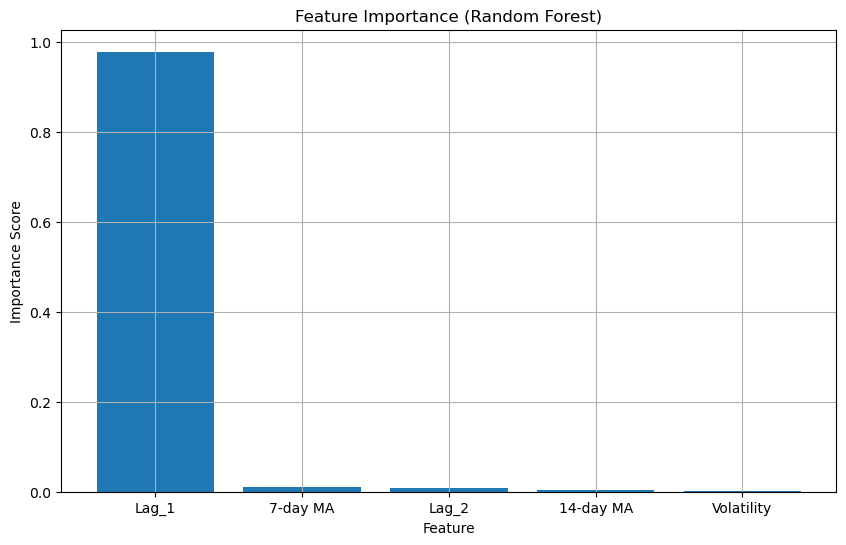

In [18]:

# Visualize feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.grid()
plt.show()


1. Feature Importance (Random Forest)
•	What is happening?
•	This bar chart shows the importance of each feature used in the Random Forest model. The “Lag_1” feature 

dominates with an importance score close to 1. The remaining features (e.g., “7-day MA,” “Lag_2,” etc.) contribute very little.

•	What does this mean?

•	The model relies heavily on “Lag_1” (previous day’s price) to make predictions, suggesting that stock prices are highly influenced by their immediate past. The other features contribute minimally, indicating they may not add significant predictive power for this particular dataset.

•	Significance:

•	While this provides insight into the Random Forest model’s decision-making process, the reliance on a single feature could mean the model might not generalize well to unseen scenarios. Investigating feature engineering or adding more diverse features could improve performance.

## Visualization: Tree Depth vs Performance

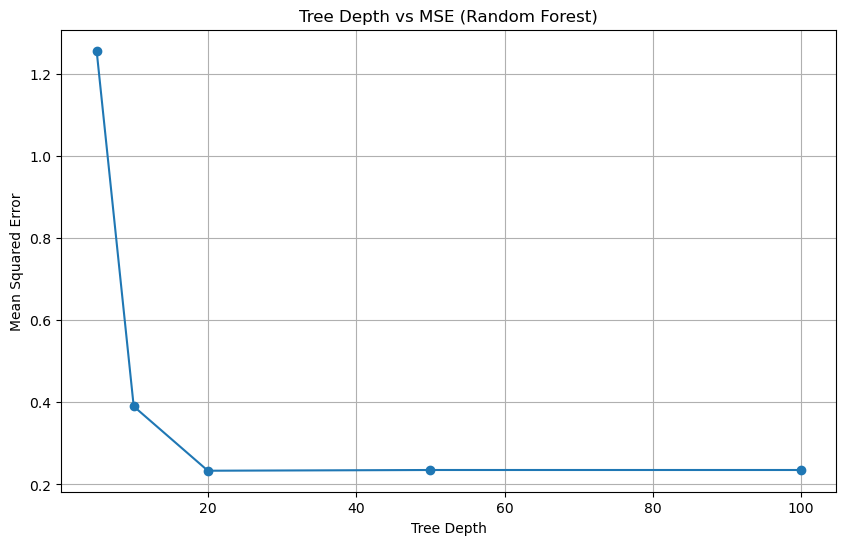

In [19]:

# Evaluate model performance with varying tree depths
depths = [5, 10, 20, 50, 100]
mse_values = []

for depth in depths:
    temp_model = RandomForestRegressor(max_depth=depth, random_state=42)
    temp_model.fit(X_train, y_train)
    temp_pred = temp_model.predict(X_test)
    mse_values.append(mean_squared_error(y_test, temp_pred))

plt.figure(figsize=(10, 6))
plt.plot(depths, mse_values, marker='o')
plt.title('Tree Depth vs MSE (Random Forest)')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Squared Error')
plt.grid()
plt.show()


2. Tree Depth vs. Performance (Random Forest)

•	What is happening?

•	This line graph tracks the Mean Squared Error (MSE) as the depth of decision trees increases. Initially, MSE decreases sharply, reaching a low point around a depth of 20, and then flattens out. Beyond this point, increasing depth does not significantly reduce error.

•	What does this mean?

•	The model improves as tree depth increases because deeper trees capture more complex patterns in the data. However, beyond a depth of 20, additional complexity does not reduce error further, suggesting that the model has captured most of the relevant patterns by this point.

•	Significance:

•	This graph helps tune the model by identifying an optimal tree depth (around 20). Limiting tree depth to this value can improve computational efficiency without sacrificing accuracy, reducing the risk of overfitting.

## Visualization: Prediction Uncertainty

/var/folders/rb/2tm7zw5j145975vwqn87sn100000gn/T/ipykernel_31727/1934720581.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([y_pred[i::10] for i in range(10)], labels=[f"Set {i+1}" for i in range(10)])


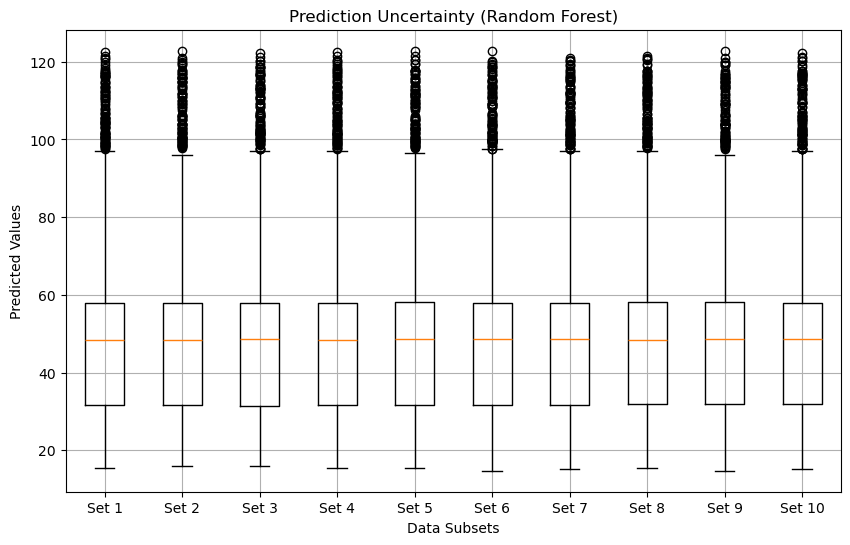

In [20]:

# Visualize prediction uncertainty
plt.figure(figsize=(10, 6))
plt.boxplot([y_pred[i::10] for i in range(10)], labels=[f"Set {i+1}" for i in range(10)])
plt.title('Prediction Uncertainty (Random Forest)')
plt.xlabel('Data Subsets')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()


3. Prediction Uncertainty (Random Forest)
•	What is happening?

•	This box plot visualizes the spread and central tendency of predicted values across 10 subsets of data. Each box shows the range of predictions, with the orange line marking the median, while the whiskers and outliers represent variability.

•	What does this mean?

•	The variability (height of the boxes) indicates uncertainty in predictions. In this case, the spread is relatively consistent across subsets, but there are outliers above 100, indicating occasional extreme predictions.

•	Significance:

•	The box plot highlights the model’s reliability and variability. Consistent median values across subsets suggest stability in the model’s predictions, while outliers may point to anomalies in the data or areas where the model struggles.

Summary of Insights:
1.	Feature Importance shows that the model primarily relies on “Lag_1,” suggesting that other features add limited value for this task.

2.	Tree Depth vs. Performance indicates that a tree depth of 20 is optimal, balancing complexity and accuracy.

3.	Prediction Uncertainty demonstrates consistent prediction behavior across data subsets but reveals outliers that could warrant further investigation.
